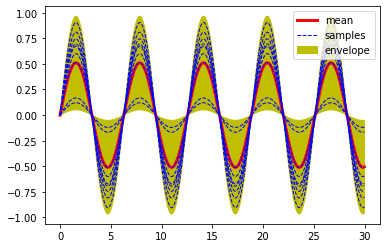

In [1]:
import numpy as np
import math as m
import statistics as sts
import matplotlib.pyplot as plt

Ns = 50
Pc = 95

A = np.random.uniform(size=Ns)
x = np.arange(0 , 30 , 0.01)
# Inicializa o array Y para que sejam empilhadas as linhas para as 50 senoides diferentes
Y = x
# Calcula várias senoides, cujas amplitudes foram geradas pelos números aleatorios com distribuição uniforme.
for i in A:
    Y = np.vstack((Y , i*np.sin(x)))
# Remove a primeira linha que não era uma senoide
Y=Y[1:]

mu = np.mean(Y , axis=0) # Cálculo da média para cada senoide

r_plus  = 0.5*(100 + Pc)
r_minus = 0.5*(100 - Pc)
Y_upp   = np.percentile(Y , r_plus , axis=0) # Cálculo do percentil superior para cada senoide
Y_low   = np.percentile(Y , r_minus , axis=0) # Cálculo do percentil inferior para cada senoide

X_env = np.concatenate((x , np.flip(x)), axis=None)
Y_env = np.concatenate((Y_upp , np.flip(Y_low)) , axis=None)
# Boa explicação para a necessidade de concatenar o array e seu "espelho"
# https://stackoverflow.com/a/7561835/11380901

plt.plot(x     , mu         , label='mean'     , color='r' ,                      linewidth=3)
plt.plot(x     , Y[0,:].T   , label='samples'  , color='b' , linestyle='dashed' , linewidth=1)
plt.plot(x     , Y[1:9,:].T ,                    color='b' , linestyle='dashed' , linewidth=1)
plt.fill(X_env , Y_env      , label='envelope' , color='y')
plt.legend()